# Figure 2 Plots

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from sklearn.metrics import r2_score
import seaborn.objects as so
import seaborn as sns
import warnings

data_folder = '../Data/Hematopoiesis/'
warnings.filterwarnings('ignore')

## Fig 2de Comparison of mean gene expression values

### Load original Day6 test data for regression

In [2]:
with h5py.File(data_folder + 'Top_1000_Genes_Logged_Time_Series_With_Monocyte_Neutrophil_Two_Classes.h5') as f: 
    X_test = list(f['X_test'])
    class_info = list(f['y_test'])

X_test = np.array(X_test)
class_info = np.array(class_info)
y_test = X_test[:, 2, : ].copy()

### Load predicted Day 6 data

In [3]:
y_test_pred = pd.read_csv(data_folder+'Top_1000_Genes_Logged_LSTM_2Layer_0.3Dropout_Day6_y_test_predicted.csv', index_col=0)
y_test_pred = y_test_pred.to_numpy()

### Seperate Monocyte and Neutrolphil indices

In [4]:
class_info = class_info[:, 1]

mon_indices = np.where(class_info == 0)[0]
neu_indices = np.where(class_info == 1)[0]
print(mon_indices.shape)
print(neu_indices.shape)

(1598,)
(1510,)


### Calculate average gene expressed for Monocyte and Neutrophil in real and predicted data

In [5]:
y_test_mon = y_test[mon_indices, :]
y_test_neu = y_test[neu_indices, :]

y_test_mon_pred = y_test_pred[mon_indices, :]
y_test_neu_pred = y_test_pred[neu_indices, :]

y_test_mon_avgs = np.average(y_test_mon, axis=0)
y_test_neu_avgs = np.average(y_test_neu, axis=0)

y_test_mon_pred_avgs = np.average(y_test_mon_pred, axis=0)
y_test_neu_pred_avgs = np.average(y_test_neu_pred, axis=0)

### Create dataframe for plotting

In [6]:
real_vs_predicted_mon = np.array([y_test_mon_avgs, y_test_mon_pred_avgs])
real_vs_predicted_mon = np.swapaxes(real_vs_predicted_mon, 0, 1)

real_vs_predicted_neu = np.array([y_test_neu_avgs, y_test_neu_pred_avgs])
real_vs_predicted_neu = np.swapaxes(real_vs_predicted_neu, 0, 1)

gene_names = np.loadtxt(data_folder + 'Top_1000_Genes_Logged_Gene_Names.txt', dtype=str)

mon_df = pd.DataFrame(real_vs_predicted_mon, columns=['Real', 'Predicted'], index=gene_names)
neu_df = pd.DataFrame(real_vs_predicted_neu, columns=['Real', 'Predicted'], index=gene_names)

### Select Interested Genes to Highlight

In [7]:
Interested_Genes = ['mt-Atp6',
                    'mt-Co2',
                    'Ppia',
                    'Itgb2',
                    'Cd33',
                    'Arg2',]
                    

mon_df_selected = mon_df[mon_df.index.isin(Interested_Genes)]
neu_df_selected = neu_df[neu_df.index.isin(Interested_Genes)]
mon_df_selected['Gene_Name'] = mon_df_selected.index
neu_df_selected['Gene_Name'] = neu_df_selected.index

### Plot Comparision of Average Gene Expression Values

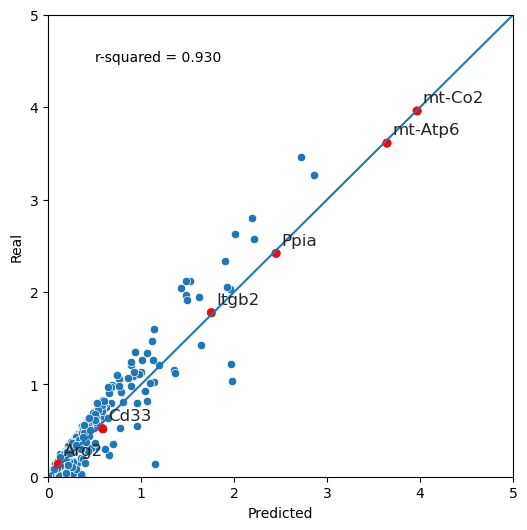

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
p1 = sns.scatterplot(data=mon_df, x='Predicted', y='Real', ax=ax)
p2 = so.Plot(mon_df_selected,x='Predicted',y='Real', text='Gene_Name').add(so.Dot(color='red')).add(so.Text(halign='left', valign='bottom')).on(ax).plot()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.annotate("r-squared = {:.3f}".format(r2_score(mon_df['Real'], mon_df['Predicted'])), (0.5, 4.5))
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.show()

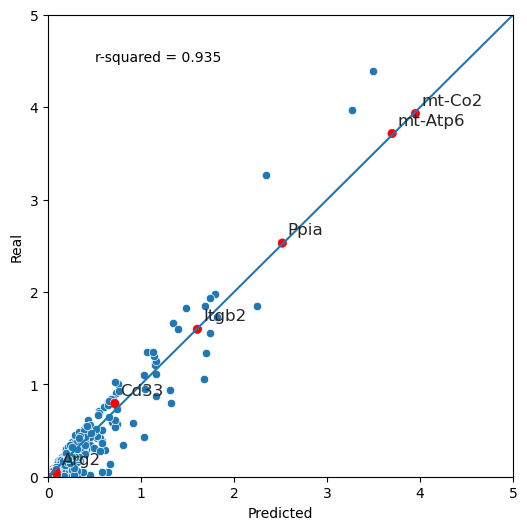

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
p1 = sns.scatterplot(data=neu_df, x='Predicted', y='Real', ax=ax)
p2 = so.Plot(neu_df_selected,x='Predicted',y='Real', text='Gene_Name').add(so.Dot(color='red')).add(so.Text(halign='left', valign='bottom')).on(ax).plot()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.annotate("r-squared = {:.3f}".format(r2_score(neu_df['Real'], neu_df['Predicted'])), (0.5, 4.5))
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.show()